**SYRIALTEL CUSTOMER CHURN PROJECT**

**USING BINARY CLASSIFICATION TO BUILD A MODEL THAT ACCURATELY PREDICTS CUSTOMER CHURN TO HELP SYRIATEL COMPANY IDENTIFY THE FACTORS CONTRIBUTING TO THE CHURN AND TAKE PROACTIVE ACTIONS TOWARDS RETAINING THEIR CUSTOMERS**

**1. BUSINESS UNDERSTANDING**

**1.1 Business overview**

SyriaTel is a telecommunication company based in Syria and have recently been faced with the challenge of customer churn which this project seeks to solve. 

This projects targets the SyrialTel company management as the **stakehlder**. this is because the management are the ones responsible for making strategic decisions to turn around the company and ensure its sustainability and competitive advantage through improved market share. cusomer churn risks leads to reduced market share thus the management need to maake an informed decisions to address the risk


**1.2 Problem statement**

Customer churn rate has a significant impact on any company's bottom line. This is because it causes loss of revenue and market share as there's considerable cost implications in the getting new customers and could affect company's reputation. It is more cost-effective to retain existing customers than using money to get new ones. The effects of customer churn makes has made it necessary for SyrialTel company to identify the factors that contribute to customer churn and take proactive steps to retain its customers. This will be achieved through developing a model that accurately predicts customer churn to allow for it to take preventive measures.

1.3 Project objective

* Develop a classifier that predicts which customers are likely to churn so that SyriaTel can take appropriate actions and reduce customer attrition.
 

**2. DATA UNDERSTANDING**

**2.1 Data source**

This project uses the SyriaTel Customer churn data set which is retrieved from Kaggle. The dataset is suitable for this project based on the following aspects;

* It contains comprehensive information on various features of the telecommunication services provided by the company including account length, area code, phone number, international plan, voice mail plan, and various other features related to customer usage patterns. 
* The data set also contains the feature 'churn,' which indicates whether a customer has churned or not which will be used as the target variable making the dataset suitable for analyzing customer churn as it contains all the necessary information to develop a predictive model.
* The data he dataset is large enough, with over 3,000 records, to support the development of a reliable and accurate predictive model.



**2.2 Summary of Features in the Dataset**

* state: the state the customer lives in
* account length: the number of days the customer has had an account
* area code: the area code of the customer
* phone number: the phone number of the customer
* international plan: true if the customer has the international plan, otherwise false
* voice mail plan: true if the customer has the voice mail plan, otherwise false
* number vmail messages: the number of voicemails the customer has sent
* total day minutes: total number of minutes the customer has been in calls during the day
* total day calls: total number of calls the user has done during the day
* total day charge: total amount of money the customer was charged by the Telecom company for calls during the day
* total eve minutes: total number of minutes the customer has been in calls during the evening
* total eve calls: total number of calls the customer has done during the evening
* total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening
* total night minutes: total number of minutes the customer has been in calls during the night
* total night calls: total number of calls the customer has done during the night
* total night charge: total amount of money the customer was charged by the Telecom company for calls during the night
* total intl minutes: total number of minutes the user has been in international calls
* total intl calls: total number of international calls the customer has done
* total intl charge: total amount of money the customer was charged by the Telecom company for international calls
* customer service calls: number of calls the customer has made to customer service
* churn: true if the customer terminated their contract, otherwise false

Lets understand our data more by importing the data and checking some of its aspects as in the cells below

In [58]:

#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
#lets import the data and display the first five observations
df = pd.read_csv("churn_telcom.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#lets check the data types per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

We have no missing values
Data has both continuous and categorical features comprising of the following data types; objects, integers, float and booleans

In [4]:
#check statistics of each Column
pd.set_option("precision", 2)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.06,39.82,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.18,42.37,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.10,13.69,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.78,54.47,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.44,20.07,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.56,9.26,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.98,50.71,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.11,19.92,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.08,4.31,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.87,50.57,23.20,167.00,201.20,235.30,395.00


In [5]:
#check number of rows and columns
df.shape

(3333, 21)

In [6]:
#Check for Unique Values
for dataset in df:
    print("For {},{} unique values present".format(dataset,df[dataset].nunique()))

For state,51 unique values present
For account length,212 unique values present
For area code,3 unique values present
For phone number,3333 unique values present
For international plan,2 unique values present
For voice mail plan,2 unique values present
For number vmail messages,46 unique values present
For total day minutes,1667 unique values present
For total day calls,119 unique values present
For total day charge,1667 unique values present
For total eve minutes,1611 unique values present
For total eve calls,123 unique values present
For total eve charge,1440 unique values present
For total night minutes,1591 unique values present
For total night calls,120 unique values present
For total night charge,933 unique values present
For total intl minutes,162 unique values present
For total intl calls,21 unique values present
For total intl charge,162 unique values present
For customer service calls,10 unique values present
For churn,2 unique values present


In [7]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [8]:
df.duplicated().sum()

0

False    2850
True      483
Name: churn, dtype: int64


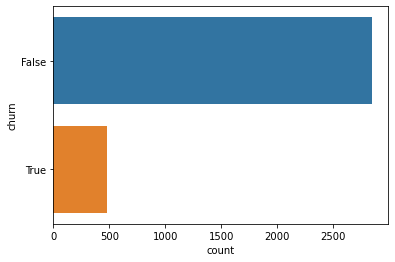

In [9]:
# Countplot of churn feature
print(df.churn.value_counts())
sns.countplot(data=df, y='churn');

Our data include categorical and numerical data.first lets check the categorical columns in our data set. see the cell below

In [60]:
#checking for categorical columns in the data set
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category' or df[col].dtype == 'bool':
        categorical_cols.append(col)
categorical_cols

['state', 'phone number', 'international plan', 'voice mail plan', 'churn']

In [61]:
#checking for numerical columns in the data set
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols

['account length',
 'area code',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

Since we have identified the categorical data from our data set lets visualize the same. see the cells below

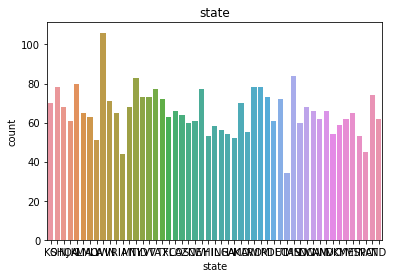

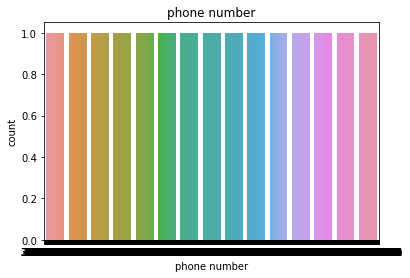

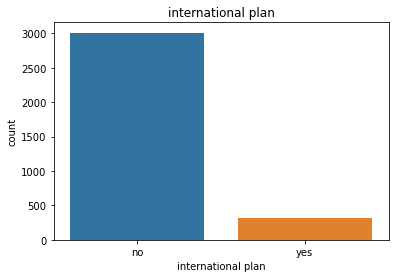

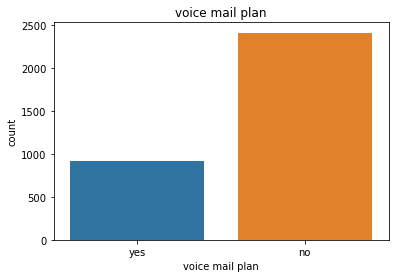

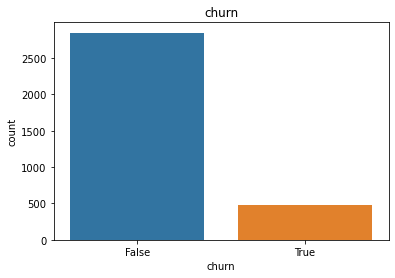

In [62]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category

#plot bar plot for each categorical column
for col in categorical_cols:
    sns.countplot(df[col])
    plt.title(col)
    plt.show()

from the above, we can see that `churn` which is our target variable has some imbalance

<AxesSubplot:>

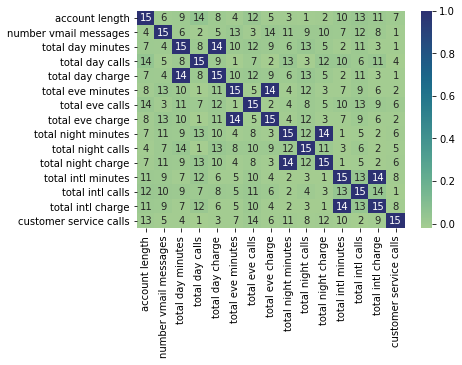

In [14]:
# Create a correlation matrix of the numerical columns
corr_matrix = df[num_cols].corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=corr_matrix.rank(axis="columns"), cmap="crest")

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])
df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**3. DATA PREPARATION**

In this stage, we are going to prepare our data to make it fit for modelling and analysis

**3.1 Data Cleaning**

Here we will clean the data to ensure  the same is ready for exploration and modelling.
lets start by dropping some columns from the data set. we will be dropping the columns `phone number` and `area code` since they add no value to the analysis and the same ensures data privacy.

In [63]:
#Drop phone number and area code for following reasons add no value and data privacy 
df.drop(["phone number", "area code"],axis=1, inplace=True)
df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


3.2 defining our X and y. 

the target variable for the study is `churn` while the rest are the predictor variables.see the cell below

In [65]:
y = df["churn"]
X = df.drop(columns=["churn"], axis=1)

lets spilt our data as in the cell below

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**3.3 Dealing with Categorical Data**

lets check the categorical data for the `X_train` data in the cell below

In [18]:
X_train_categorical = X_train.select_dtypes(exclude=["int64", "float64"]).copy()
X_train_categorical

,state,international plan,voice mail plan
427,NH,no,yes
1656,ND,no,yes
1042,FL,yes,yes
1867,NH,yes,yes
346,WI,no,yes
...,...,...,...
835,GA,no,no
3264,RI,no,yes
1653,MD,yes,no
2607,IL,no,no


In [19]:
# checking categorical data in X-test data
X_test_categorical = X_test.select_dtypes(exclude=["int64", "float64"]).copy()
X_test_categorical

,state,international plan,voice mail plan
405,WI,yes,no
118,MO,no,yes
710,TN,no,no
499,WV,no,no
2594,OH,yes,no
...,...,...,...
3254,IL,no,yes
3027,WV,no,yes
1366,NY,no,no
457,KY,no,no


since we have identified the categorical data in X_train and X_test data, lets trsform the same using Label ecoder in the cells below

In [20]:
#Transforming X_train data
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
X_train_categorical['international plan'] = label_encoder.fit_transform(X_train_categorical['international plan'])
X_train_categorical['voice mail plan'] = label_encoder.fit_transform(X_train_categorical['voice mail plan'])
X_train_categorical['state'] = label_encoder.fit_transform(X_train_categorical['state'])
X_train_categorical.head()

,state,international plan,voice mail plan
427,30,0,1
1656,28,0,1
1042,9,1,1
1867,30,1,1
346,48,0,1


In [21]:
#Transforming X_test data
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
X_test_categorical['international plan'] = label_encoder.fit_transform(X_test_categorical['international plan'])
X_test_categorical['voice mail plan'] = label_encoder.fit_transform(X_test_categorical['voice mail plan'])
X_test_categorical['state'] = label_encoder.fit_transform(X_test_categorical['state'])
X_test_categorical.head()

,state,international plan,voice mail plan
405,48,1,0
118,24,0,1
710,42,0,0
499,49,0,0
2594,35,1,0


SInce we have dealt with our categorical data, lets create a new data frame that contains all numerics data for both X_train and X_test data. we will the scale the numerical data before joining the categorical and numerical into one full df. see the cells below

In [22]:
#creating a numeric df for the X_train data
X_train_numeric = X_train.select_dtypes(include=["int64", "float64"]).copy()
X_train_numeric

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
427,67,40,104.9,65,17.83,216.3,93,18.39,217.4,128,9.78,9.6,9,2.59,1
1656,101,28,105.9,132,18.00,231.7,107,19.69,281.3,120,12.66,10.7,5,2.89,1
1042,91,24,93.5,112,15.90,183.4,128,15.59,240.7,133,10.83,9.9,3,2.67,0
1867,142,25,191.1,109,32.49,149.6,120,12.72,227.8,60,10.25,9.8,3,2.65,0
346,81,33,161.6,117,27.47,123.0,90,10.46,261.3,101,11.76,12.2,5,3.29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,27,0,72.7,75,12.36,208.6,117,17.73,65.8,71,2.96,9.9,3,2.67,1
3264,89,24,97.8,98,16.63,207.2,67,17.61,214.5,126,9.65,5.9,2,1.59,0
1653,93,0,131.4,78,22.34,219.7,106,18.67,155.7,103,7.01,11.1,2,3.00,1
2607,91,0,189.3,100,32.18,239.3,107,20.34,89.7,89,4.04,9.9,3,2.67,3


In [23]:
#scaling the numerical X_train data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)
X_train_scaled

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
427,0.29,0.78,0.30,0.39,0.30,0.59,0.55,0.59,0.52,0.73,0.52,0.48,0.45,0.48,0.11
1656,0.43,0.55,0.30,0.80,0.30,0.64,0.63,0.64,0.69,0.66,0.69,0.54,0.25,0.54,0.11
1042,0.39,0.47,0.27,0.68,0.27,0.50,0.75,0.50,0.58,0.76,0.59,0.50,0.15,0.49,0.00
1867,0.61,0.49,0.54,0.66,0.54,0.41,0.71,0.41,0.55,0.21,0.55,0.49,0.15,0.49,0.00
346,0.35,0.65,0.46,0.71,0.46,0.34,0.53,0.34,0.64,0.52,0.64,0.61,0.25,0.61,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.11,0.00,0.21,0.45,0.21,0.57,0.69,0.57,0.11,0.29,0.11,0.50,0.15,0.49,0.11
3264,0.38,0.47,0.28,0.59,0.28,0.57,0.39,0.57,0.51,0.71,0.51,0.30,0.10,0.29,0.00
1653,0.40,0.00,0.37,0.47,0.37,0.60,0.62,0.60,0.36,0.53,0.36,0.56,0.10,0.56,0.11
2607,0.39,0.00,0.54,0.61,0.54,0.66,0.63,0.66,0.18,0.43,0.18,0.50,0.15,0.49,0.33


In [24]:
#lets use concat method to join th categoricals an the scaled numeric data
X_train_full = pd.concat([X_train_scaled, X_train_categorical], axis=1)
X_train_full

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,state,international plan,voice mail plan
427,0.29,0.78,0.30,0.39,0.30,0.59,0.55,0.59,0.52,0.73,0.52,0.48,0.45,0.48,0.11,30,0,1
1656,0.43,0.55,0.30,0.80,0.30,0.64,0.63,0.64,0.69,0.66,0.69,0.54,0.25,0.54,0.11,28,0,1
1042,0.39,0.47,0.27,0.68,0.27,0.50,0.75,0.50,0.58,0.76,0.59,0.50,0.15,0.49,0.00,9,1,1
1867,0.61,0.49,0.54,0.66,0.54,0.41,0.71,0.41,0.55,0.21,0.55,0.49,0.15,0.49,0.00,30,1,1
346,0.35,0.65,0.46,0.71,0.46,0.34,0.53,0.34,0.64,0.52,0.64,0.61,0.25,0.61,0.11,48,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.11,0.00,0.21,0.45,0.21,0.57,0.69,0.57,0.11,0.29,0.11,0.50,0.15,0.49,0.11,10,0,0
3264,0.38,0.47,0.28,0.59,0.28,0.57,0.39,0.57,0.51,0.71,0.51,0.30,0.10,0.29,0.00,39,0,1
1653,0.40,0.00,0.37,0.47,0.37,0.60,0.62,0.60,0.36,0.53,0.36,0.56,0.10,0.56,0.11,20,1,0
2607,0.39,0.00,0.54,0.61,0.54,0.66,0.63,0.66,0.18,0.43,0.18,0.50,0.15,0.49,0.33,14,0,0


In [25]:
#creating a numeric df for the X_test data
X_test_numeric = X_test.select_dtypes(include=["int64", "float64"]).copy()
X_test_numeric

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
405,92,0,264.3,91,44.93,160.9,115,13.68,198.6,73,8.94,9.3,5,2.51,0
118,112,36,113.7,117,19.33,157.5,82,13.39,177.6,118,7.99,10.0,3,2.70,2
710,69,0,195.3,70,33.20,216.7,108,18.42,259.9,119,11.70,12.5,4,3.38,3
499,95,0,175.2,91,29.78,244.4,109,20.77,75.8,95,3.41,7.5,2,2.03,1
2594,115,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,57,30,179.2,105,30.46,283.2,83,24.07,228.1,77,10.26,14.7,5,3.97,1
3027,101,28,220.3,96,37.45,285.8,72,24.29,203.0,111,9.14,9.4,6,2.54,4
1366,89,0,89.5,66,15.22,179.3,104,15.24,225.1,116,10.13,12.3,1,3.32,3
457,54,0,159.8,99,27.17,264.0,64,22.44,115.7,70,5.21,9.7,7,2.62,2


In [26]:
#scaling the numerical X_test data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_test_numeric)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)
X_test_scaled

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
405,0.38,0.00,0.77,0.57,0.77,0.39,0.65,0.39,0.50,0.23,0.50,0.52,0.26,0.52,0.00
118,0.46,0.72,0.33,0.73,0.33,0.37,0.35,0.37,0.43,0.57,0.43,0.56,0.16,0.56,0.25
710,0.28,0.00,0.57,0.44,0.57,0.57,0.59,0.57,0.70,0.58,0.70,0.69,0.21,0.70,0.38
499,0.39,0.00,0.51,0.57,0.51,0.66,0.60,0.66,0.10,0.40,0.10,0.42,0.11,0.42,0.12
2594,0.47,0.00,1.00,0.51,1.00,0.52,0.57,0.52,0.56,0.49,0.56,0.66,0.42,0.66,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,0.23,0.60,0.52,0.66,0.52,0.78,0.36,0.78,0.60,0.26,0.60,0.82,0.26,0.82,0.12
3027,0.41,0.56,0.64,0.60,0.64,0.79,0.25,0.79,0.51,0.52,0.51,0.52,0.32,0.52,0.50
1366,0.36,0.00,0.26,0.41,0.26,0.44,0.55,0.44,0.59,0.56,0.59,0.68,0.05,0.68,0.38
457,0.22,0.00,0.46,0.62,0.46,0.72,0.18,0.72,0.23,0.21,0.23,0.54,0.37,0.54,0.25


In [27]:
#lets use concat method to join th categoricals an the scaled numeric data
X_test_full = pd.concat([X_test_scaled, X_test_categorical], axis=1)
X_test_full

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,state,international plan,voice mail plan
405,0.38,0.00,0.77,0.57,0.77,0.39,0.65,0.39,0.50,0.23,0.50,0.52,0.26,0.52,0.00,48,1,0
118,0.46,0.72,0.33,0.73,0.33,0.37,0.35,0.37,0.43,0.57,0.43,0.56,0.16,0.56,0.25,24,0,1
710,0.28,0.00,0.57,0.44,0.57,0.57,0.59,0.57,0.70,0.58,0.70,0.69,0.21,0.70,0.38,42,0,0
499,0.39,0.00,0.51,0.57,0.51,0.66,0.60,0.66,0.10,0.40,0.10,0.42,0.11,0.42,0.12,49,0,0
2594,0.47,0.00,1.00,0.51,1.00,0.52,0.57,0.52,0.56,0.49,0.56,0.66,0.42,0.66,0.12,35,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,0.23,0.60,0.52,0.66,0.52,0.78,0.36,0.78,0.60,0.26,0.60,0.82,0.26,0.82,0.12,14,0,1
3027,0.41,0.56,0.64,0.60,0.64,0.79,0.25,0.79,0.51,0.52,0.51,0.52,0.32,0.52,0.50,49,0,1
1366,0.36,0.00,0.26,0.41,0.26,0.44,0.55,0.44,0.59,0.56,0.59,0.68,0.05,0.68,0.38,34,0,0
457,0.22,0.00,0.46,0.62,0.46,0.72,0.18,0.72,0.23,0.21,0.23,0.54,0.37,0.54,0.25,17,0,0


**KNN classifier**

TO Use the KNN Classifier, we will first need to determine the best value for k. this will be acchieved though iterating over a range of K values (from 1 to 20 in this case) and use 5-fold cross-validation to evaluate the KNN classifier's performance. 

lets start by creating a baseline KNN classifier 

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_baseline = KNeighborsClassifier()#instanciating the KNN classifier with 5 neighbors
scores = cross_val_score(knn_baseline, X_train_full, y_train, cv=5)
knn_baseline.fit(X_train_full, y_train)  # Fit the classifier to the scaled training data


KNeighborsClassifier()

In the cell below, lets make prediction of the churn.

In [38]:
y_pred_baseline=knn_baseline.predict(X_test_full)

lets visualize the results of the y-pred using the confusion matrix.A confusion matrix is a popular visualization for evaluating the performance of a binary classifier. It provides a tabular representation of predicted versus actual labels. 

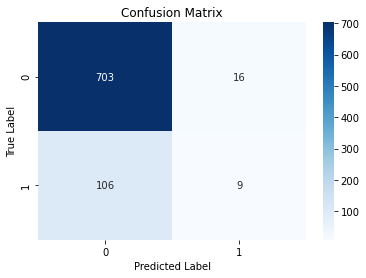

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# lets compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_baseline) # Compute confusion matrix
# lets now Create a heatmap plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [47]:
#imprting required library
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, y_pred_baseline)

Precision Score: 0.36
Recall Score: 0.0782608695652174
Accuracy Score: 0.8537170263788969
F1 Score: 0.1285714285714286


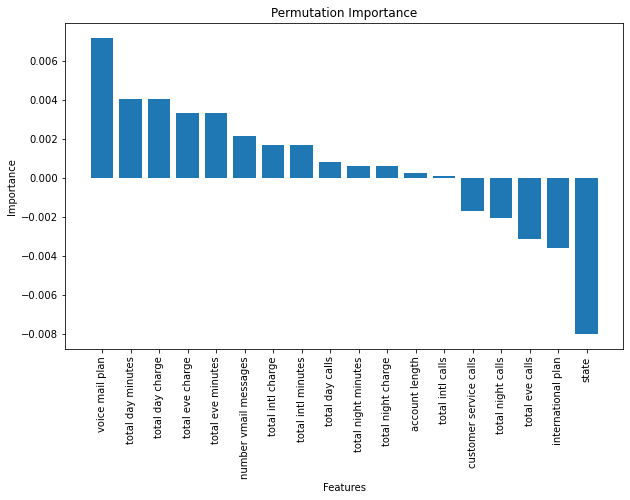

In [71]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(knn_baseline, X_test_full, y_test, n_repeats=10, random_state=42)

# Get feature importances
importances = result.importances_mean
sorted_indices = np.argsort(importances)[::-1]
sorted_features = X_train_full.columns[sorted_indices]
sorted_importances = importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances)
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Permutation Importance')
plt.show()

the model demostartaed low rate on the recal so we will build a second model with more kneighbours so that we can confirm that the baseline model is not verfitting.

lets build the second knn c;assifier with 10 k neighbors 

In [48]:
knn_10 = KNeighborsClassifier(n_neighbors=10)  # instanciating the KNN classifier with 5 neighbors
scores = cross_val_score(knn_10, X_train_full, y_train, cv=5)
knn_10.fit(X_train_full, y_train)  # Fit the classifier to the scaled training data

KNeighborsClassifier(n_neighbors=10)

In [49]:
y_pred_10=knn_10.predict(X_test_full)

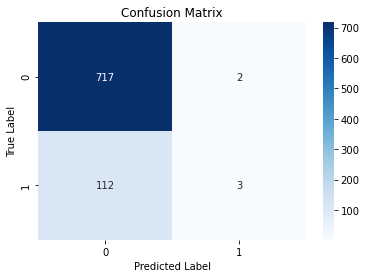

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# lets compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_10) # Compute confusion matrix
# lets now Create a heatmap plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [51]:
#imprting required library
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, y_pred_10)

Precision Score: 0.6
Recall Score: 0.02608695652173913
Accuracy Score: 0.8633093525179856
F1 Score: 0.049999999999999996


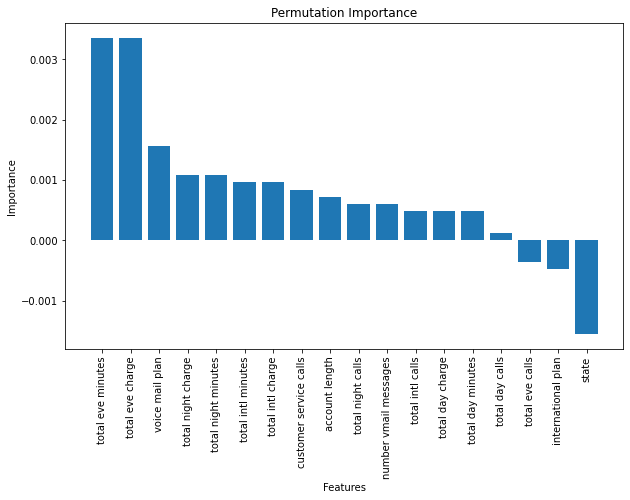

In [70]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(knn_10, X_test_full, y_test, n_repeats=10, random_state=42)

# Get feature importances
importances = result.importances_mean
sorted_indices = np.argsort(importances)[::-1]
sorted_features = X_train_full.columns[sorted_indices]
sorted_importances = importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances)
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Permutation Importance')
plt.show()


from the above evaluation metrics, the perfomance of the knn classifier became worse when we tried to increase the value for k neighbours. we can try find the best value for k then change the distance metric from euclidean to manhattan to see whether the perfomance of the model will improve.

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


k_values = list(range(1, 21)) # Defining the range of K values 
mean_accuracy = [] # Creating an empty list to store the mean accuracy for each K
# Perform cross-validation for each K value
for k in k_values:
    knn_bestvalue = KNeighborsClassifier(n_neighbors=k, metric="manhattan")
    scores = cross_val_score(knn_bestvalue, X_train_full, y_train, cv=5)  # 5-fold cross-validation
    mean_accuracy.append(scores.mean())
    
best_k = k_values[mean_accuracy.index(max(mean_accuracy))]#Finding the K value with the highest mean accuracy
print("the highest mean accuracy:", best_k)


the highest mean accuracy: 3


From the above cell, we identified that the best value for K is 3. we will use this value to instanciate the KNN bestvalue classifier then fit the training data. See the cell below

In [53]:
from sklearn.neighbors import KNeighborsClassifier # importing the required library

knn_bestvalue = KNeighborsClassifier(n_neighbors=3)  # instanciating the KNN classifier with 5 neighbors
knn_bestvalue.fit(X_train_full, y_train)  # Fit the classifier to the scaled training data

KNeighborsClassifier(n_neighbors=3)

Since we hav already fitted the training data, lets make prediction of the churn. see the cell below. 

In [54]:
y_pred_bestvalue = knn_bestvalue.predict(X_test_full)

lets visualize the results of the KNN_bestvalue  y-pred using the confusion matrix.

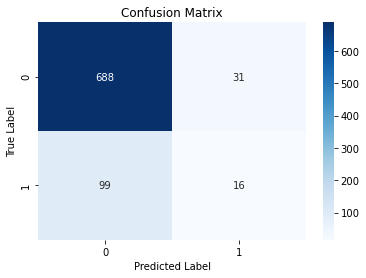

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# lets compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_bestvalue) # Compute confusion matrix
# lets now Create a heatmap plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Now lets evaluate the model using precision, accuracy, f1 and recall scores in the cells below

In [72]:
#imprting required library
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, y_pred_bestvalue)

Precision Score: 0.3404255319148936
Recall Score: 0.1391304347826087
Accuracy Score: 0.8441247002398081
F1 Score: 0.19753086419753085


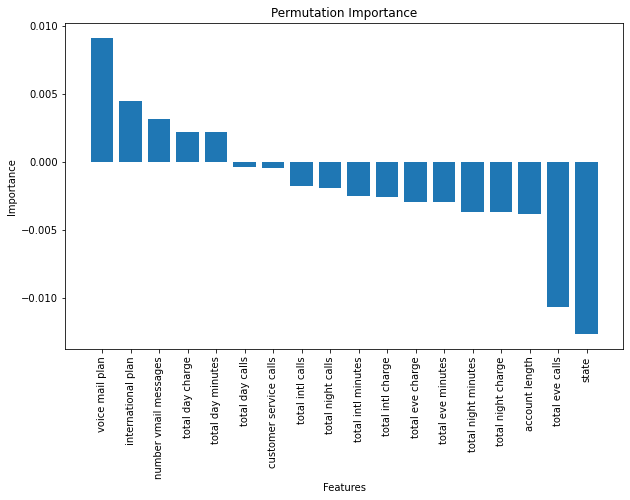

In [73]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(knn_bestvalue, X_test_full, y_test, n_repeats=10, random_state=42)

# Get feature importances
importances = result.importances_mean
sorted_indices = np.argsort(importances)[::-1]
sorted_features = X_train_full.columns[sorted_indices]
sorted_importances = importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances)
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Permutation Importance')
plt.show()

**RESULTS**

The results of the 3 knn classifiers are as follows;

* The precision scores for the knn_baseline, knn_10 and knn_bestvalue are 36%,60% and 34.04% respectively, which indicates the percentage of the correctly churned customers out of all the instances predicted as churned customers. Higher precision indicates a lower rate of false positives, which means fewer non-churned customers are incorrectly classified as churned.
* The accuracy scores for the knn_baseline, knn_10 and knn_bestvalue are 85.37%, 86.33% and 84.41% respectively, which represents the overall correctness of the model's predictions.  
* The recall score for the knn_baseline, knn_10 and knn_bestvalue are7.82%, 2.60% and 13.91% respectively  which signifies the proportion of actual churned customers that were correctly identified by the model.
* The F1 score for the knn_baseline, knn_10 and knn_bestvalue are12.85%, 5% and 19.75% respectively, which is the harmonic mean of precision and recall.A higher F1 score indicates a better trade-off between precision and recall. In this case, the F1 score suggests that the model's performance is relatively low in terms of capturing both true positives and avoiding false positives.

**KNN CLASIFIER CONCLUSION**

The Performance of the knn model has improved since the recal score has moved up to 13.91%. all the knn classifiers has low recal score ranging from .82%, 2.6% and 13.91%. A low recall score suggests that the model has a high rate of false negatives, meaning a significant number of churned customers are being incorrectly classified as non-churned.  With these results, i would recommend the use of another classifier since false negatives would lead to the company making decisions based on wrong information.